### Some more visualizations and understanding of the data preparation phase

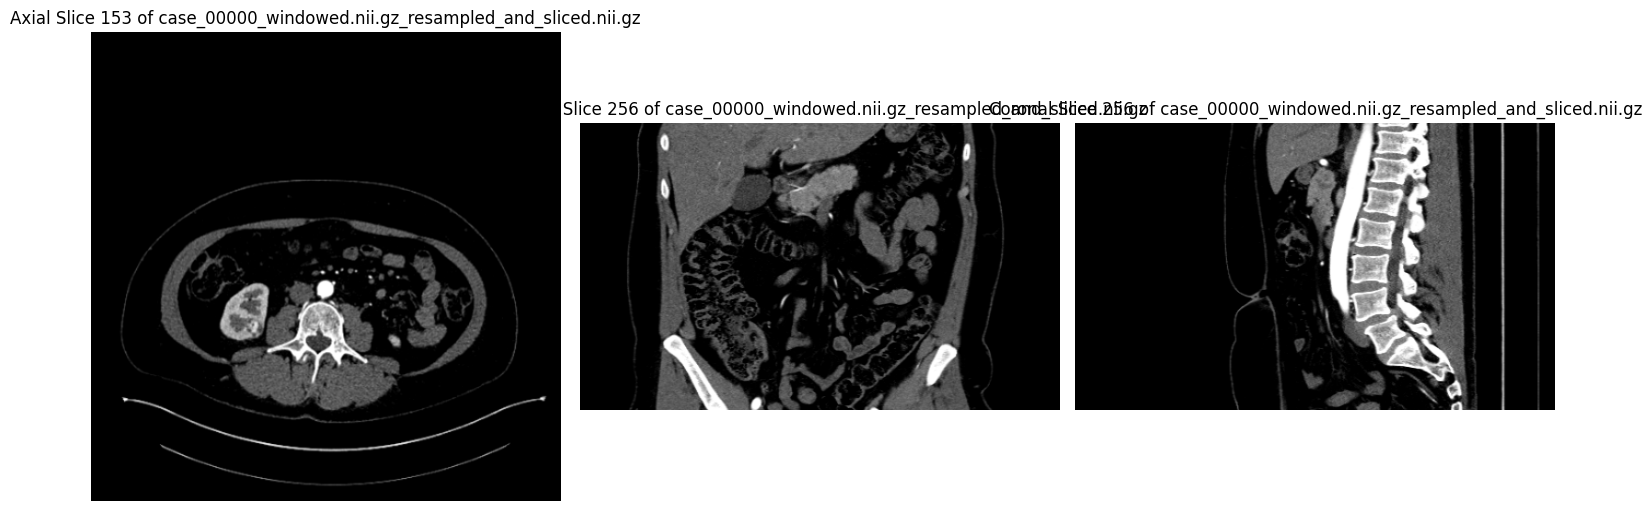

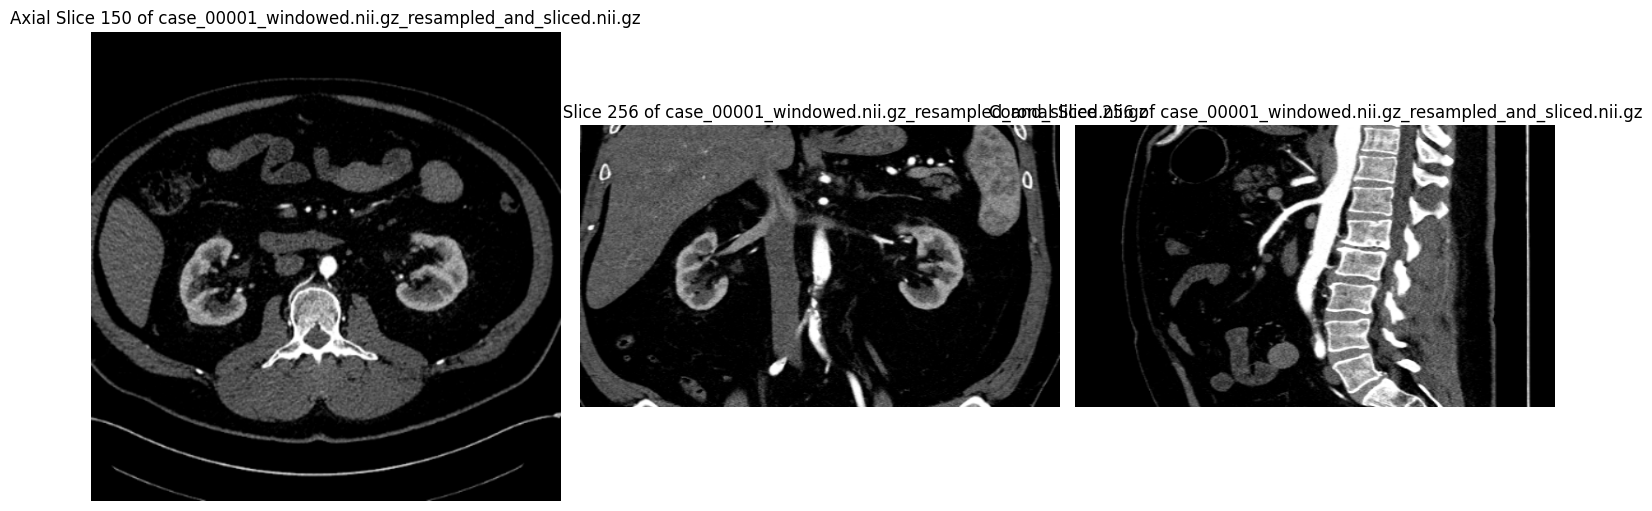

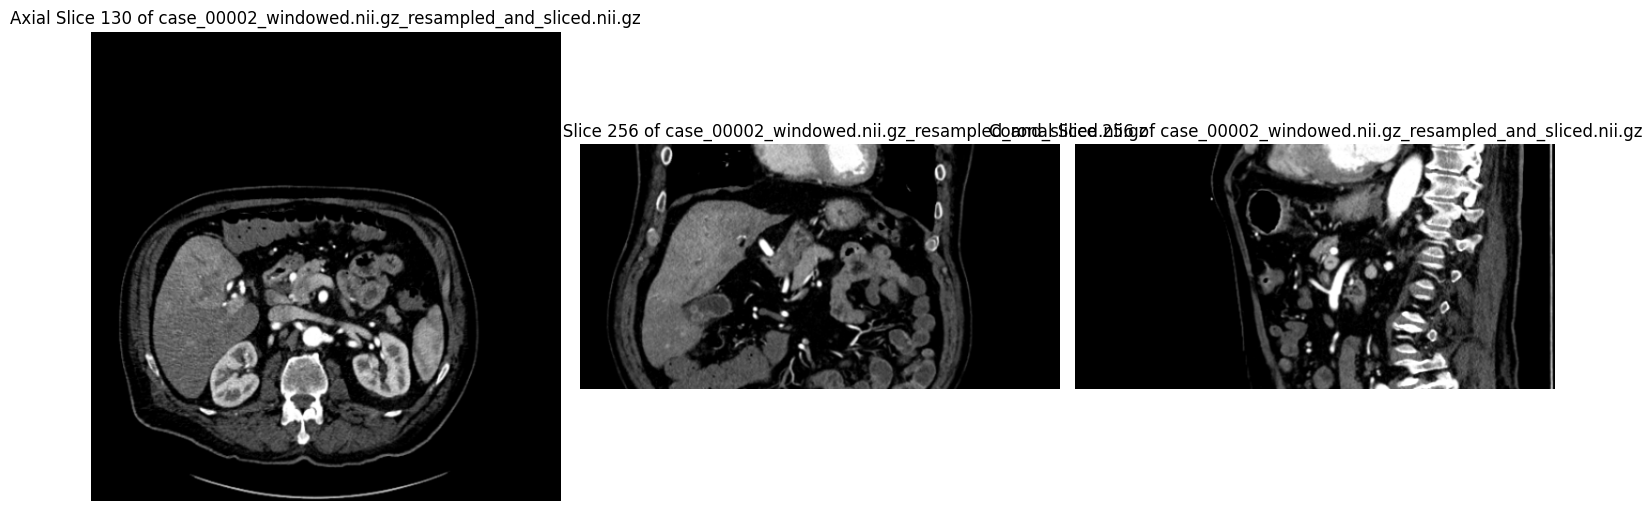

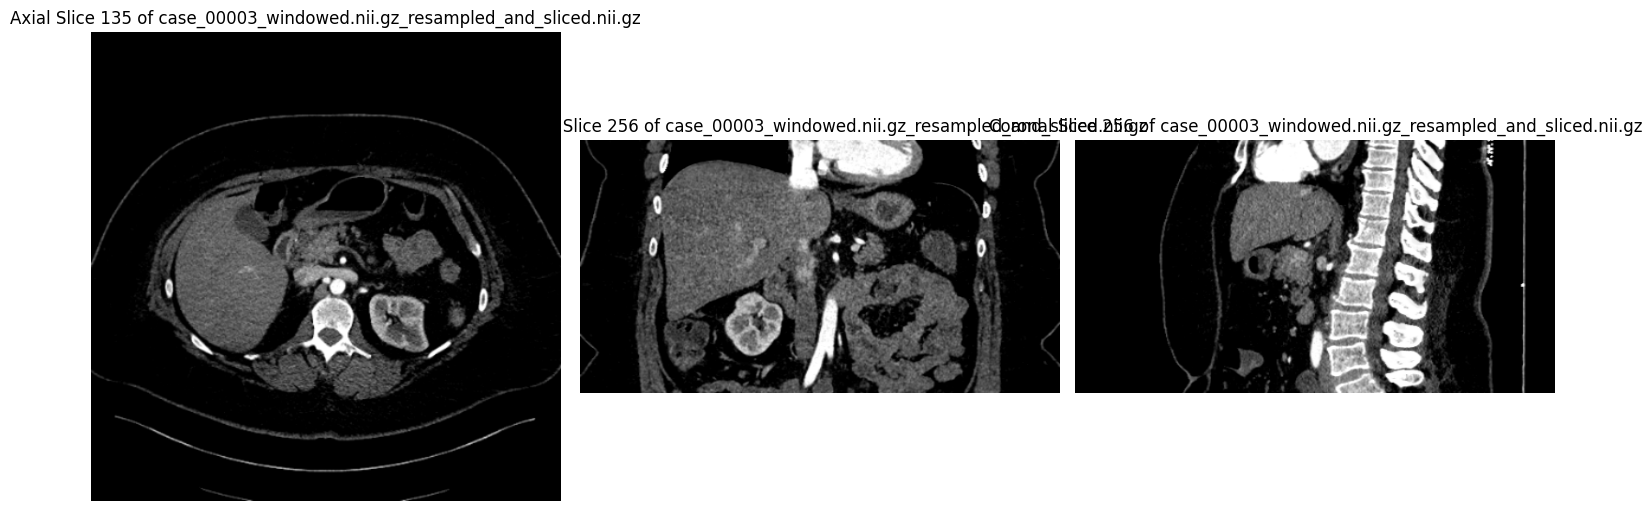

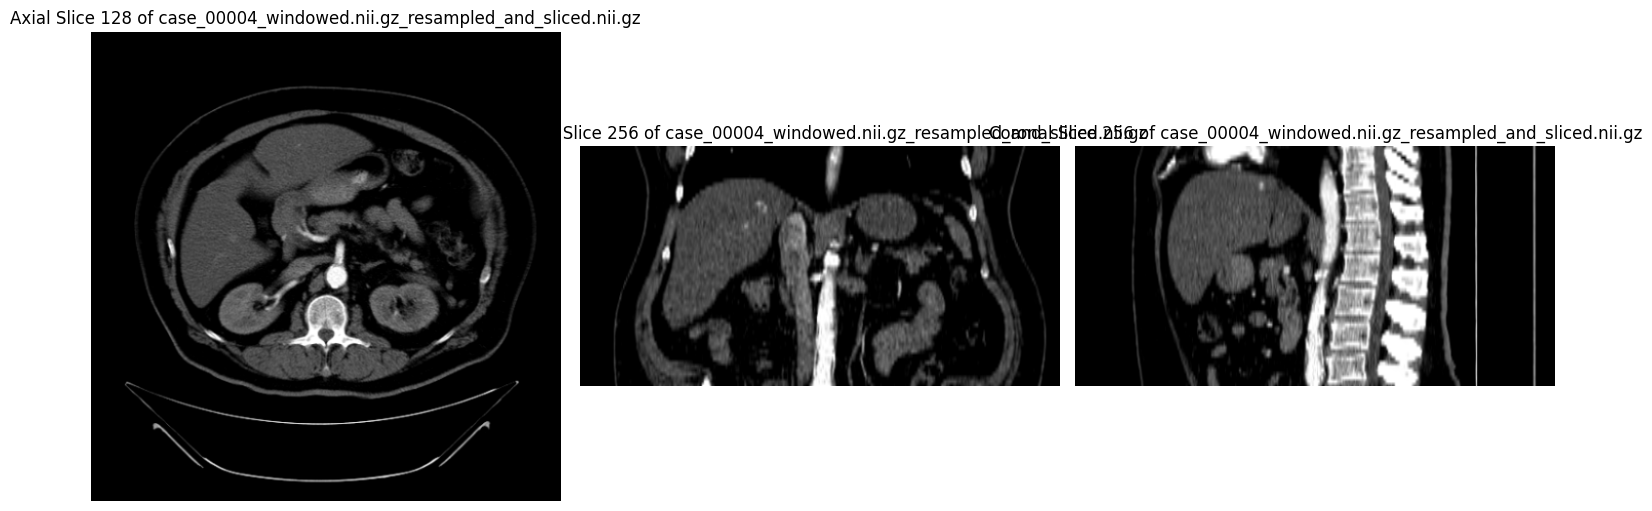

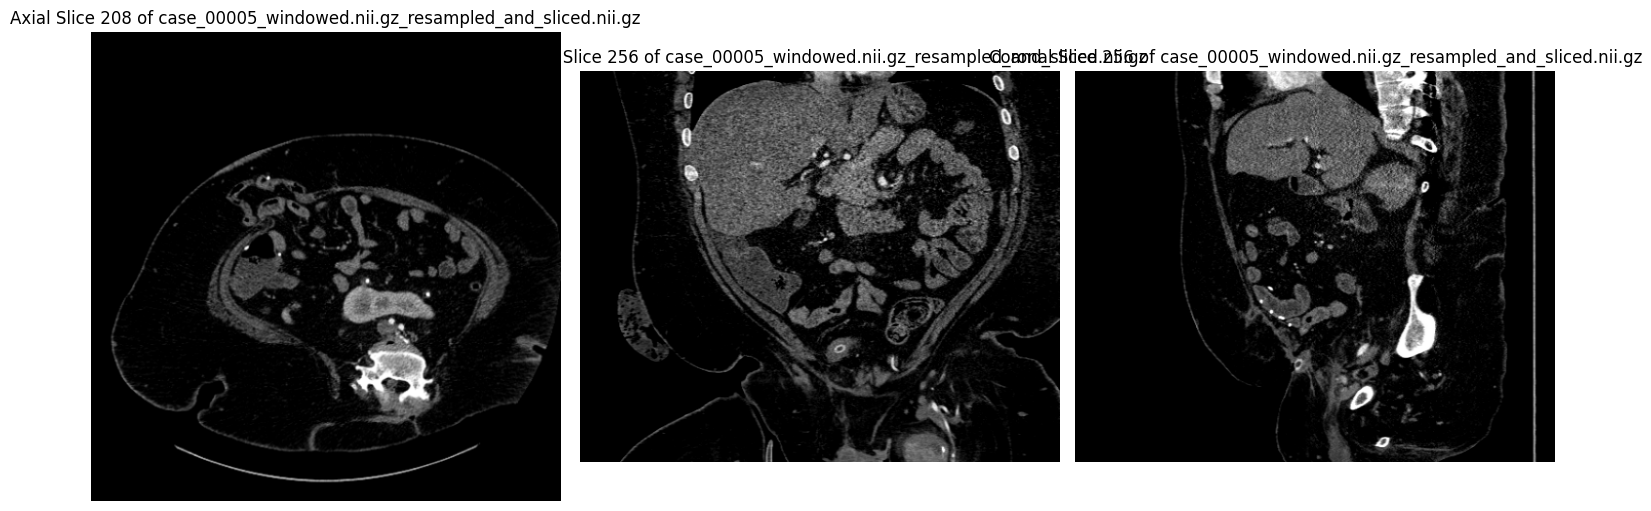

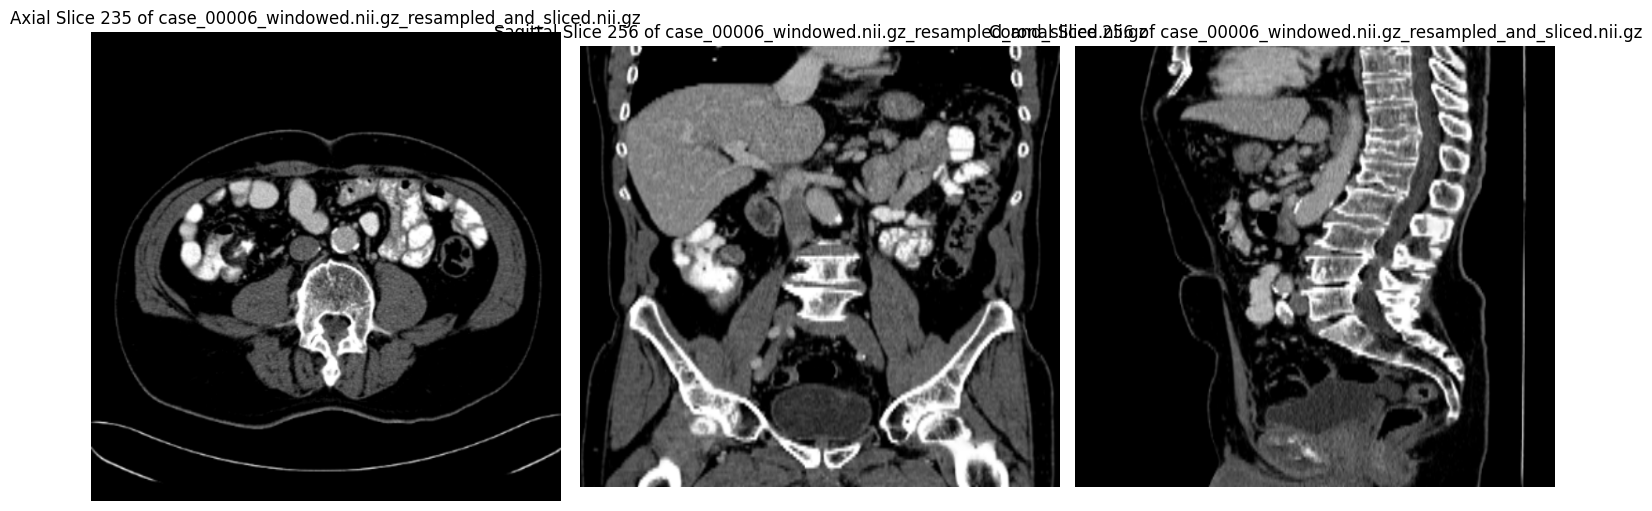

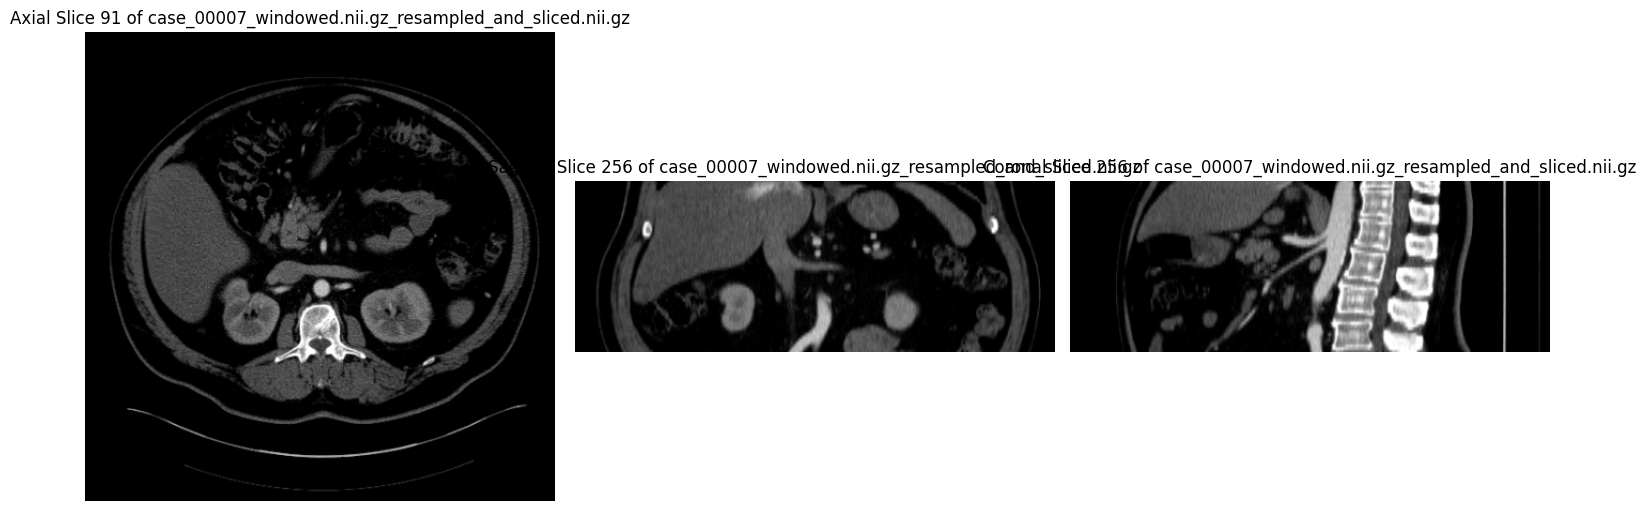

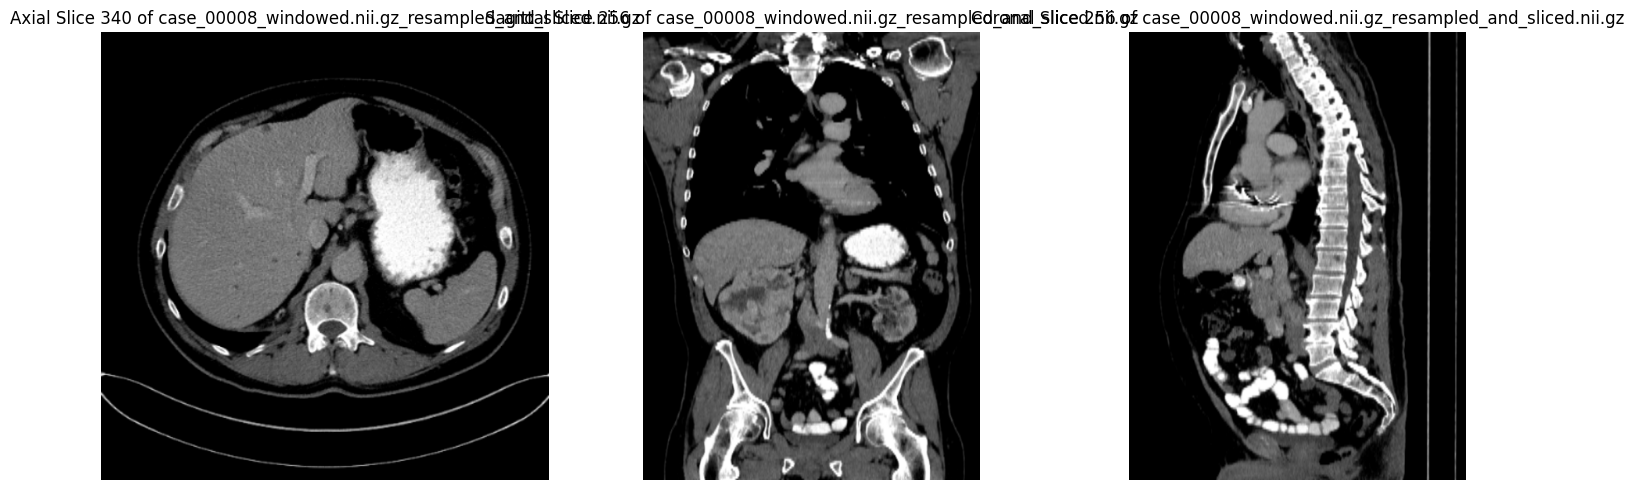

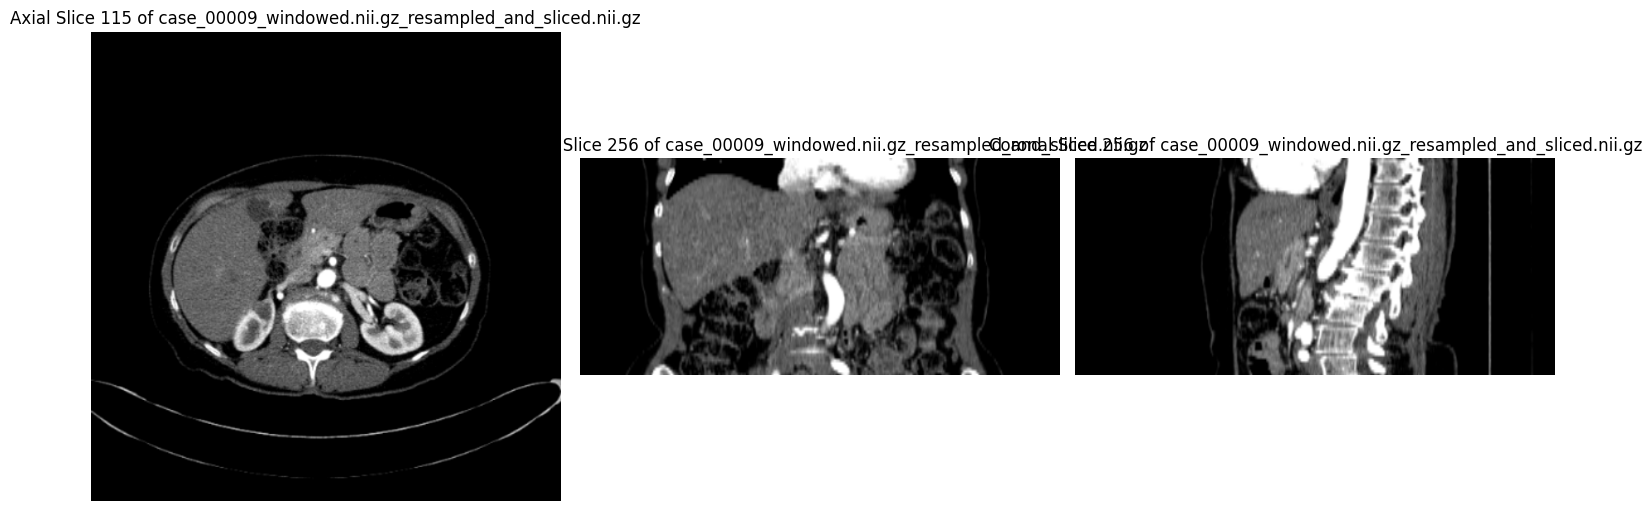

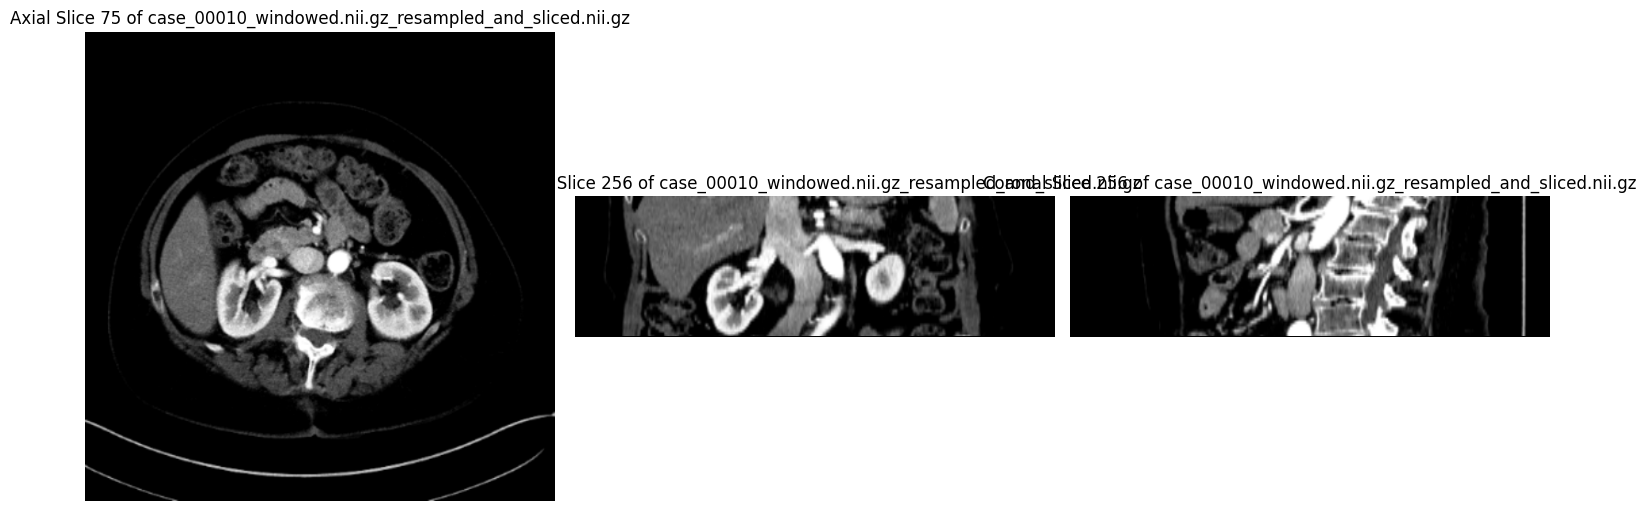

In [2]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Define the directory containing the processed files
processed_path = "D:/kits23/resampled_and_sliced_images/"

# Define the range of case numbers to visualize (00000 to 00010)
case_range = range(0, 11)  # First 11 cases (00000 to 00010)

# Loop through each case in the range
for case_num in case_range:
    # Format the case name with leading zeros
    case_name = f"case_{case_num:05d}_windowed.nii.gz_resampled_and_sliced.nii.gz"
    case_file = os.path.join(processed_path, case_name)

    # Check if the file exists
    if not os.path.exists(case_file):
        print(f"File not found: {case_file}")
        continue

    # Load the NIfTI file
    nifti_obj = nib.load(case_file)
    slices_data = nifti_obj.get_fdata()

    # Select the middle slice for each plane
    slice_index_axial = slices_data.shape[0] // 2  # Middle slice in axial plane
    slice_index_sagittal = slices_data.shape[1] // 2  # Middle slice in sagittal plane
    slice_index_coronal = slices_data.shape[2] // 2  # Middle slice in coronal plane

    # Extract slices for each plane
    axial_slice = slices_data[slice_index_axial, :, :]
    sagittal_slice = slices_data[:, slice_index_sagittal, :]
    coronal_slice = slices_data[:, :, slice_index_coronal]

    # Plot the slices
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(axial_slice, cmap="gray")
    axes[0].set_title(f"Axial Slice {slice_index_axial} of {case_name}")
    axes[0].axis("off")

    axes[1].imshow(sagittal_slice, cmap="gray")
    axes[1].set_title(f"Sagittal Slice {slice_index_sagittal} of {case_name}")
    axes[1].axis("off")

    axes[2].imshow(coronal_slice, cmap="gray")
    axes[2].set_title(f"Coronal Slice {slice_index_coronal} of {case_name}")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()


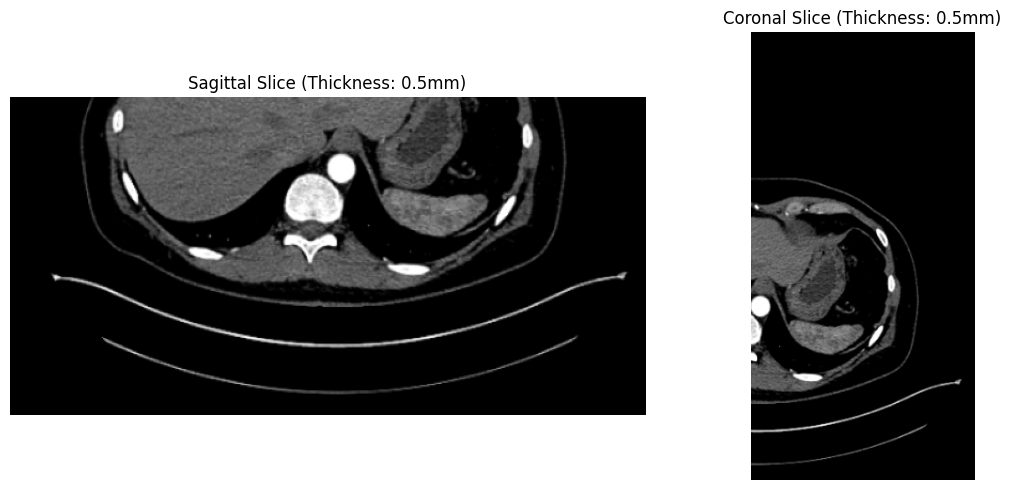

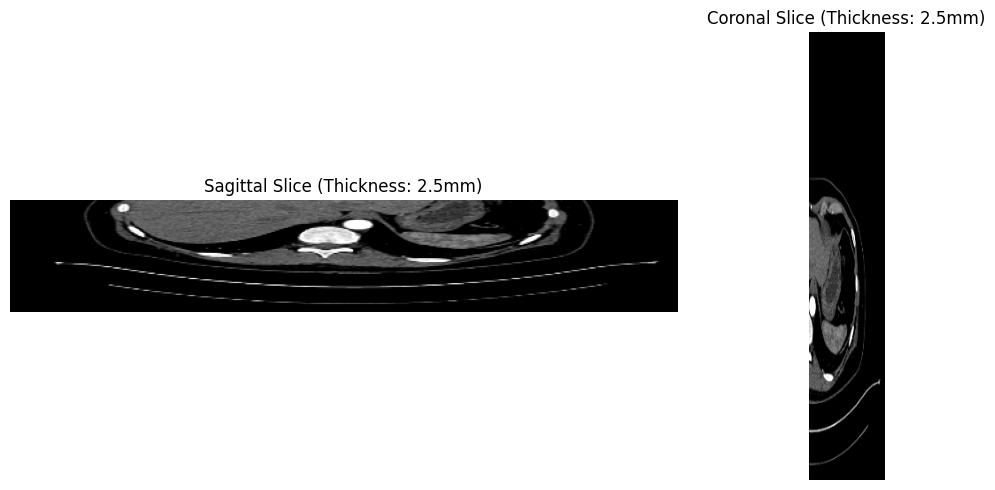

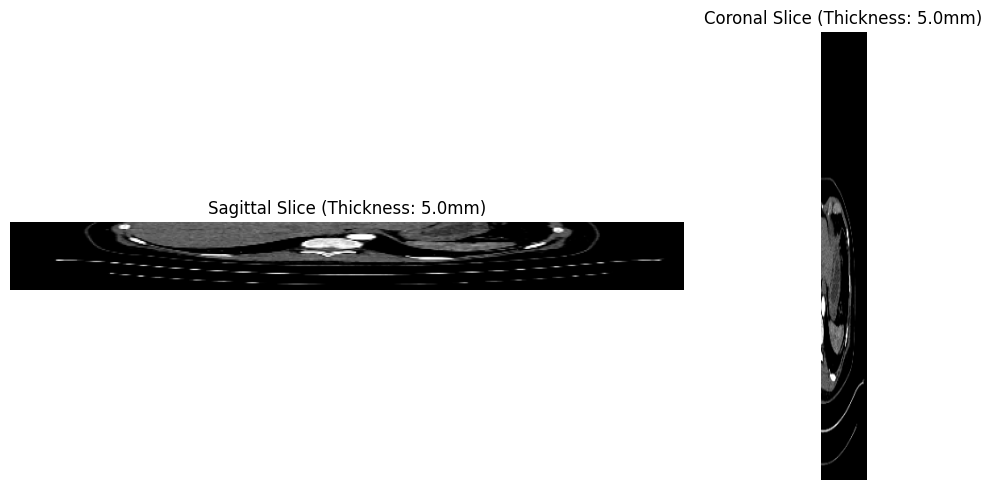

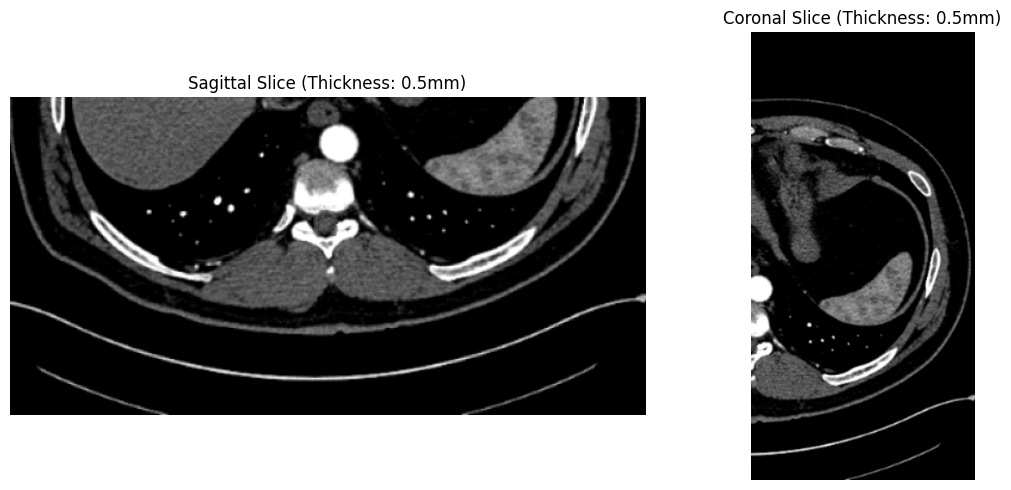

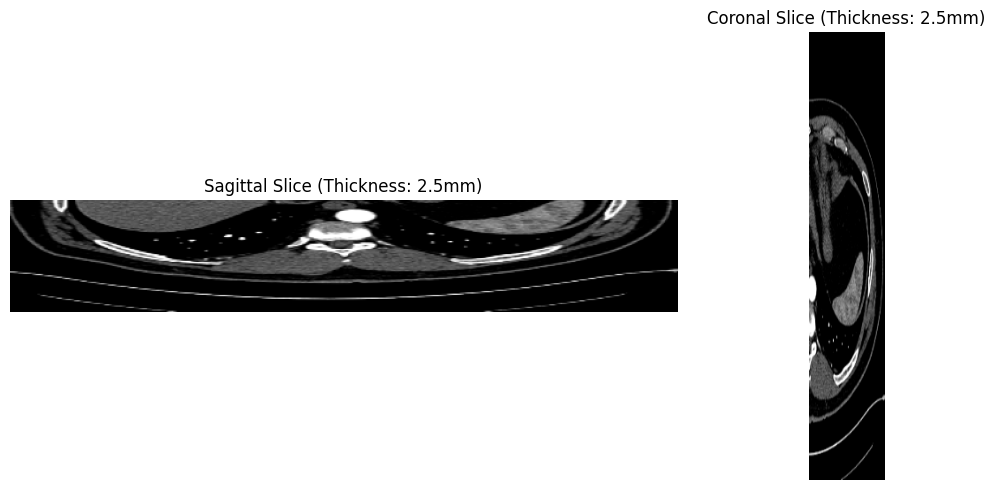

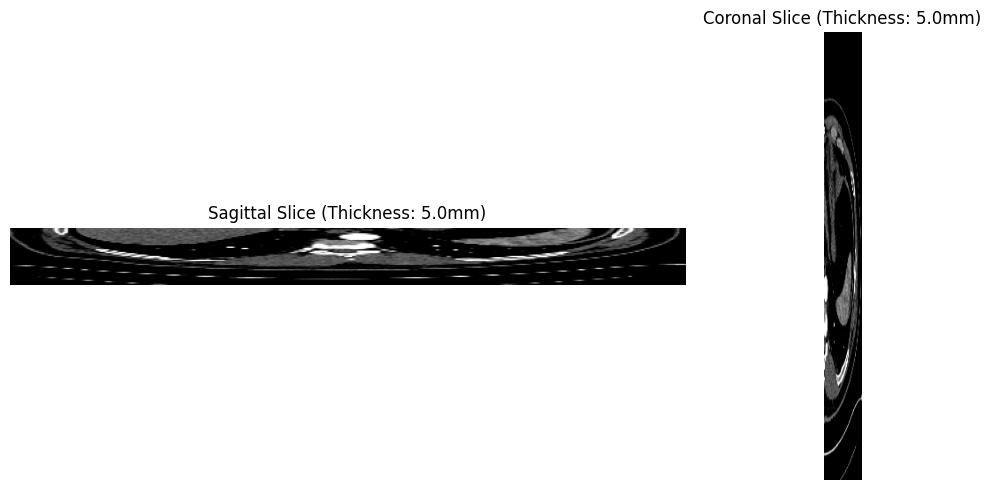

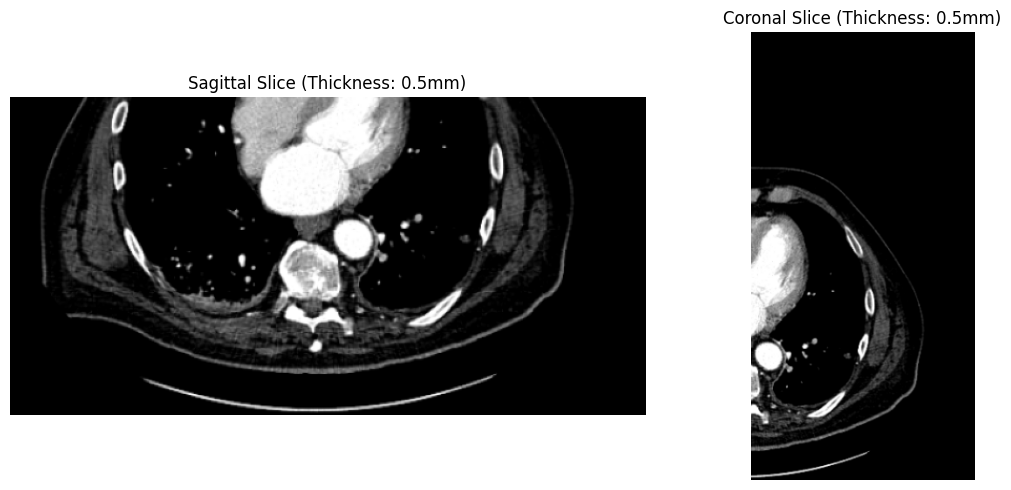

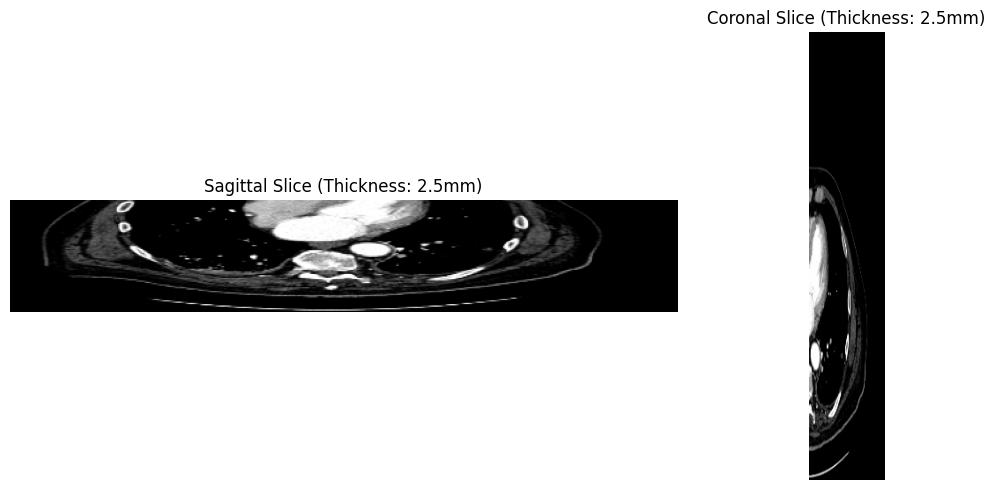

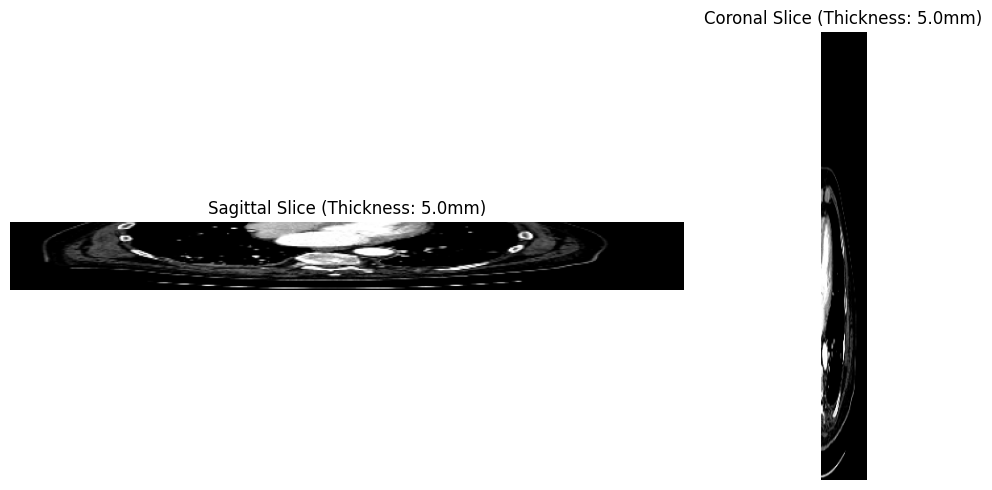

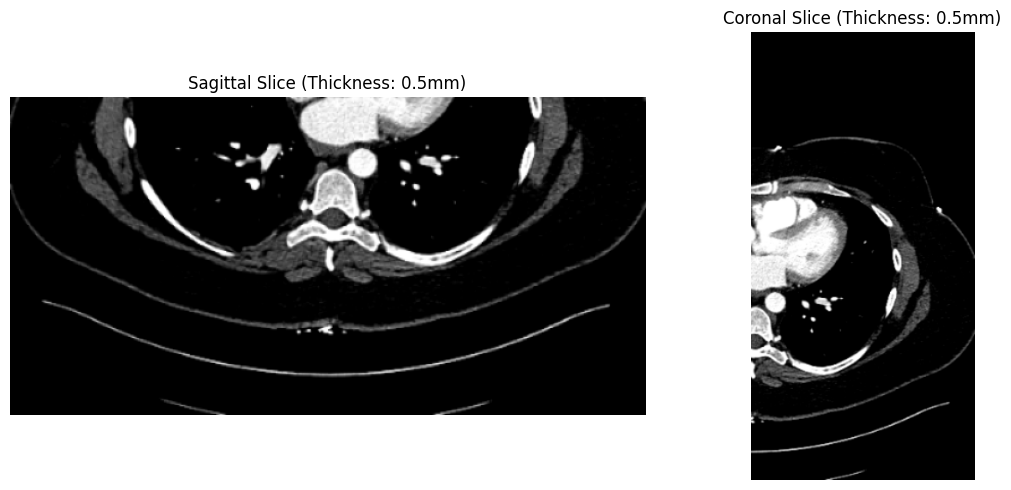

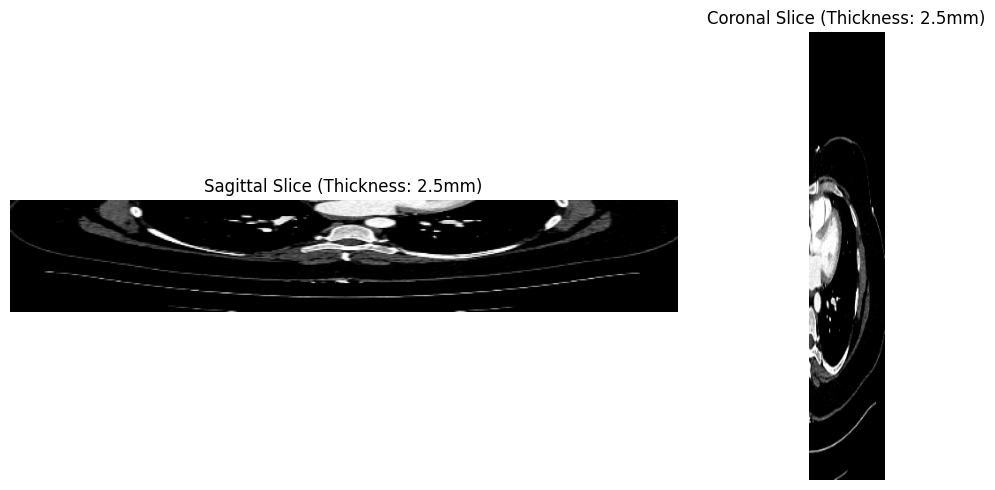

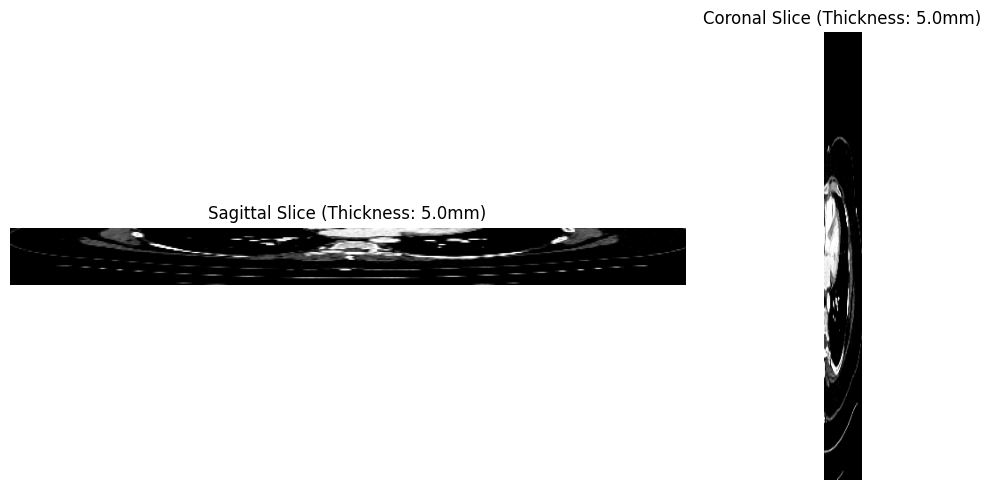

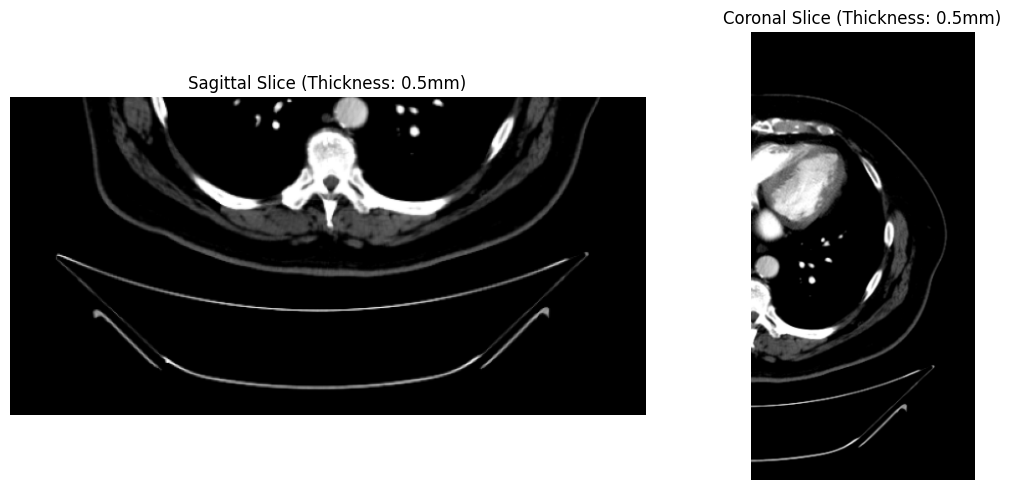

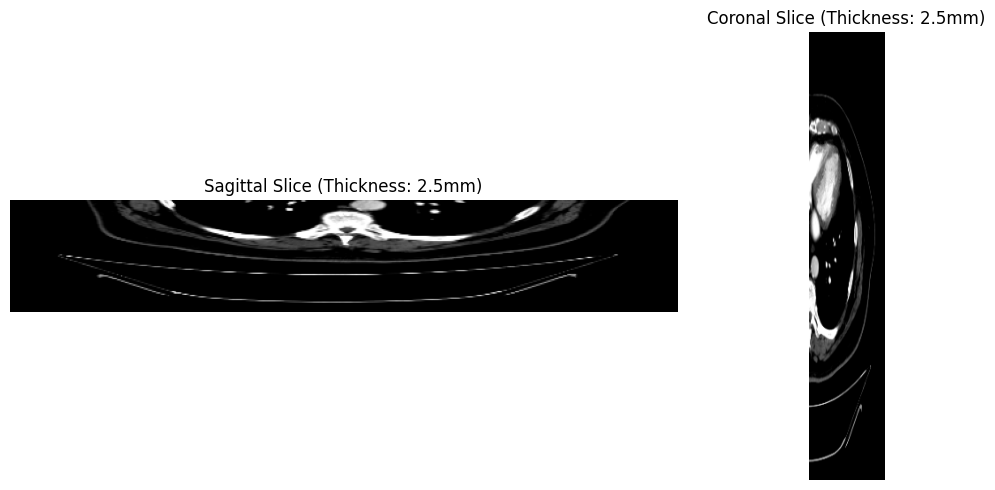

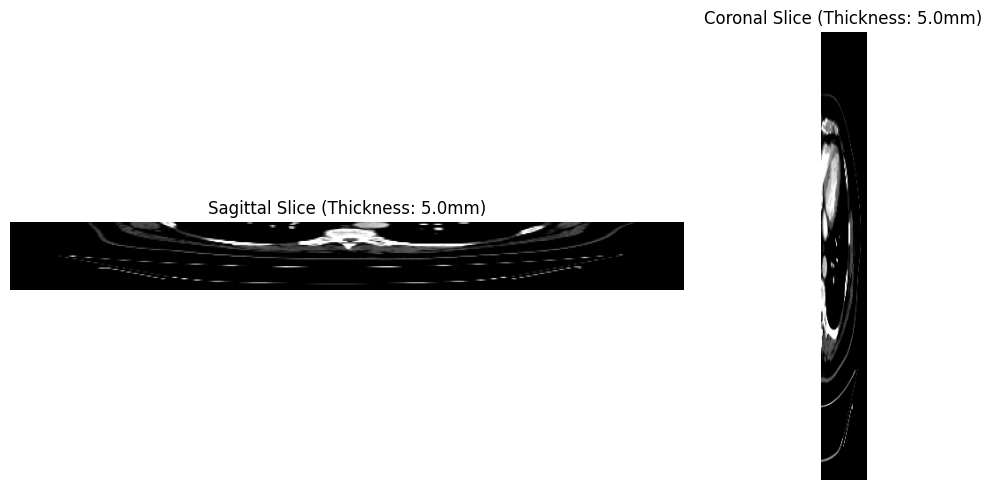

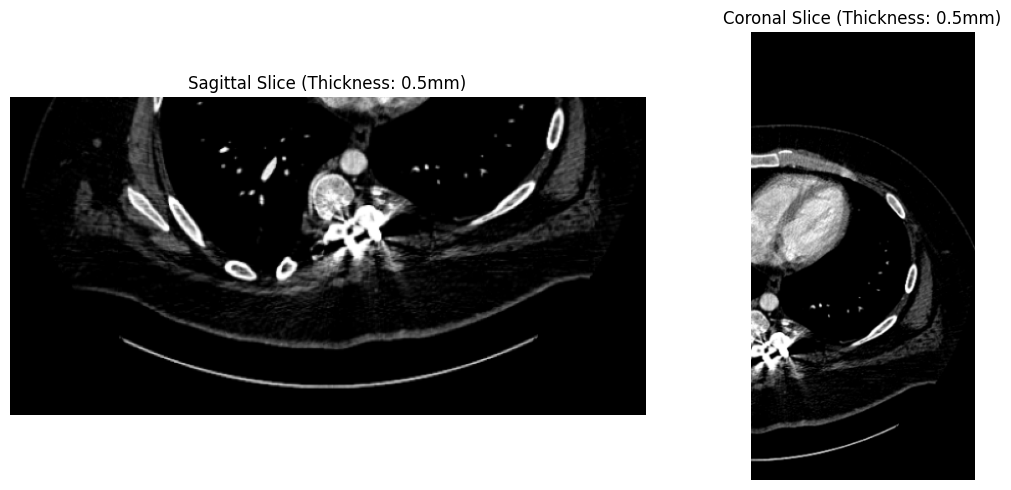

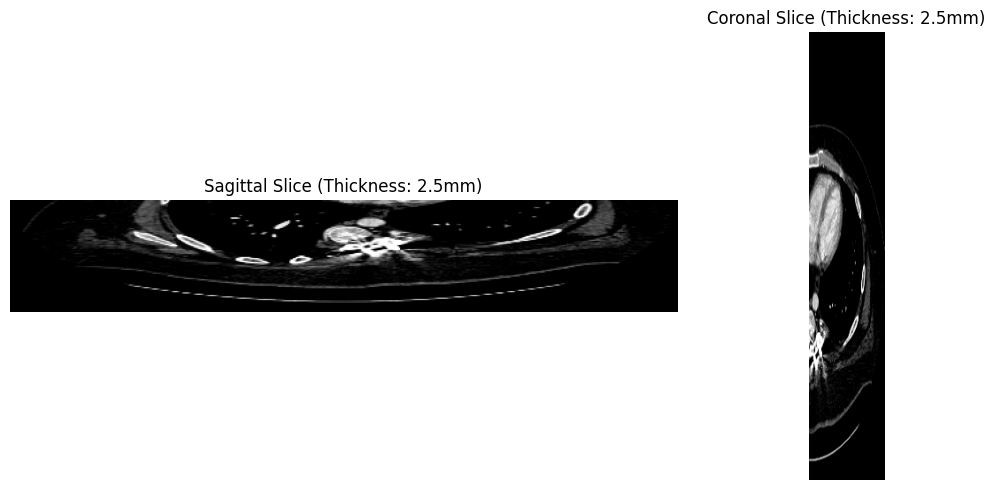

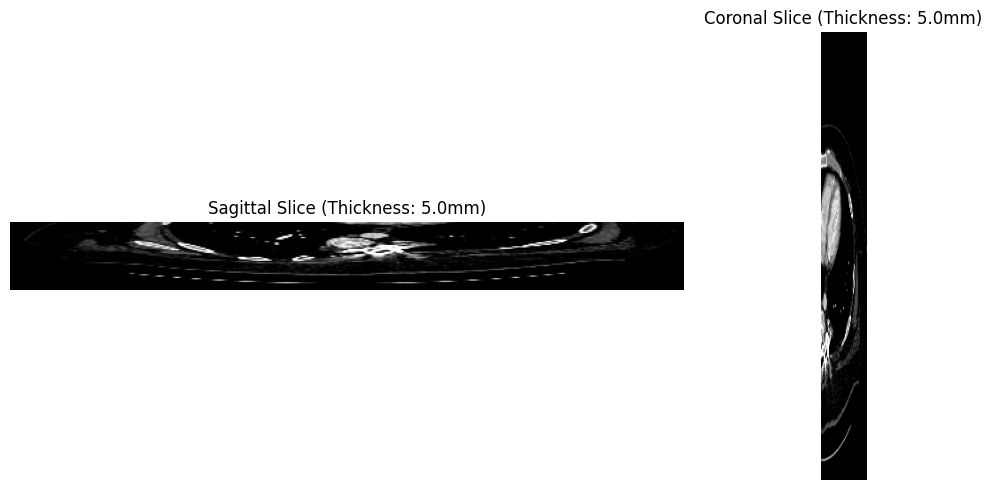

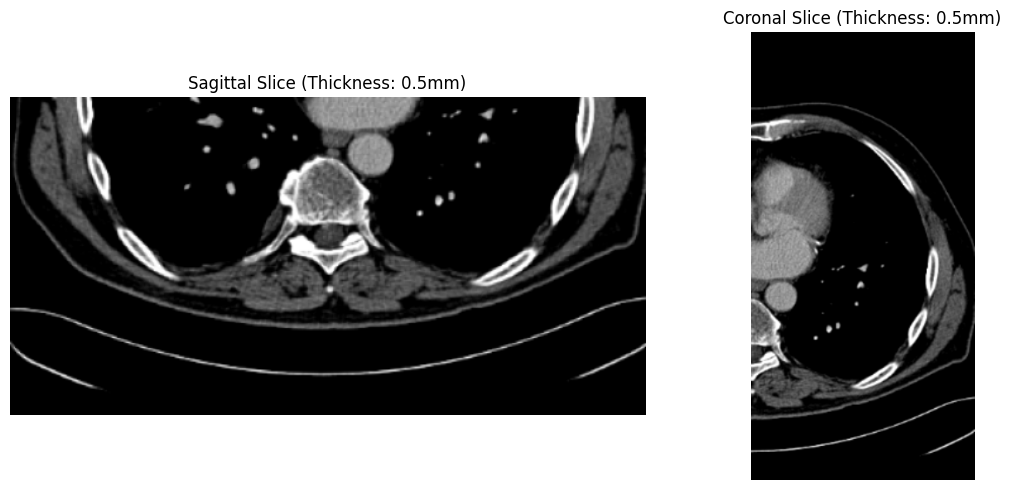

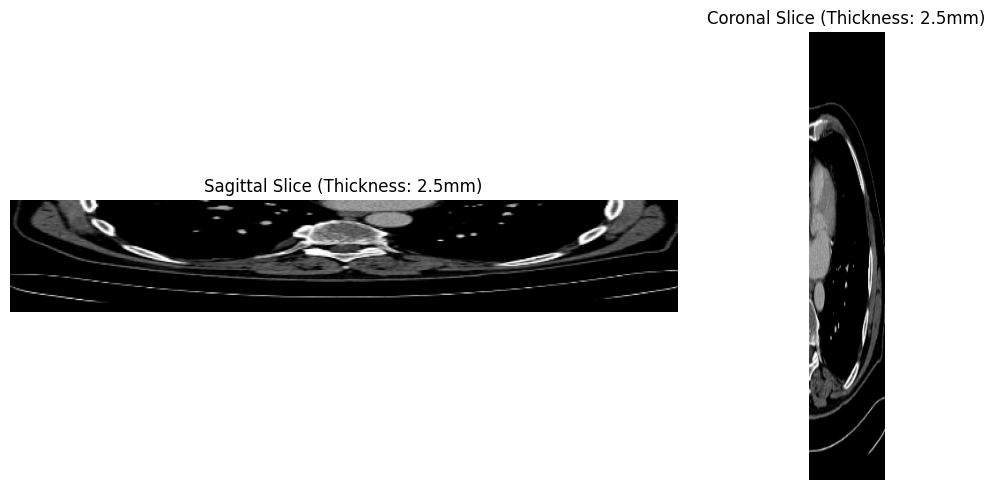

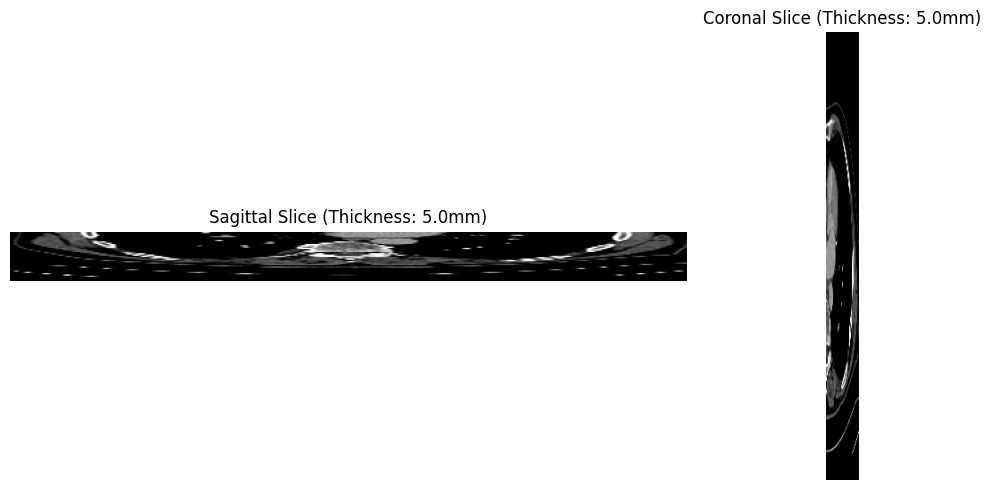

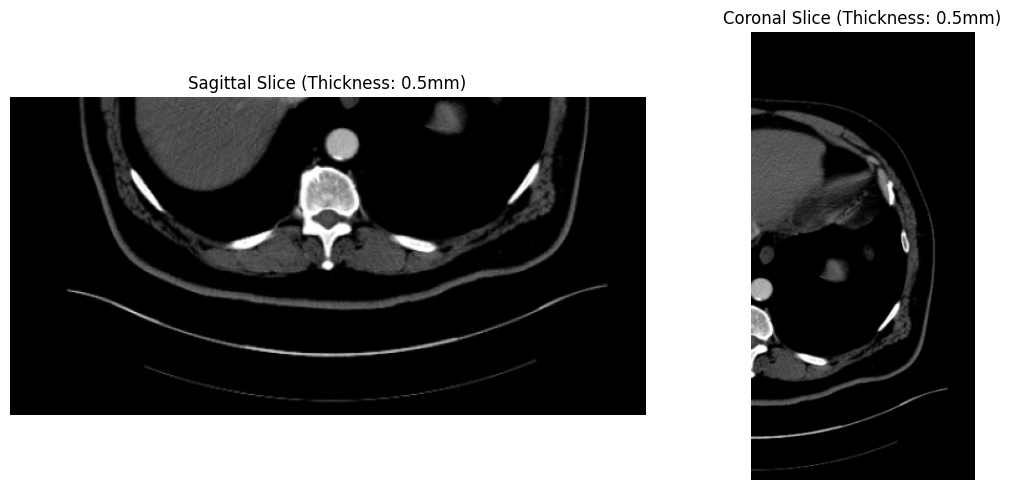

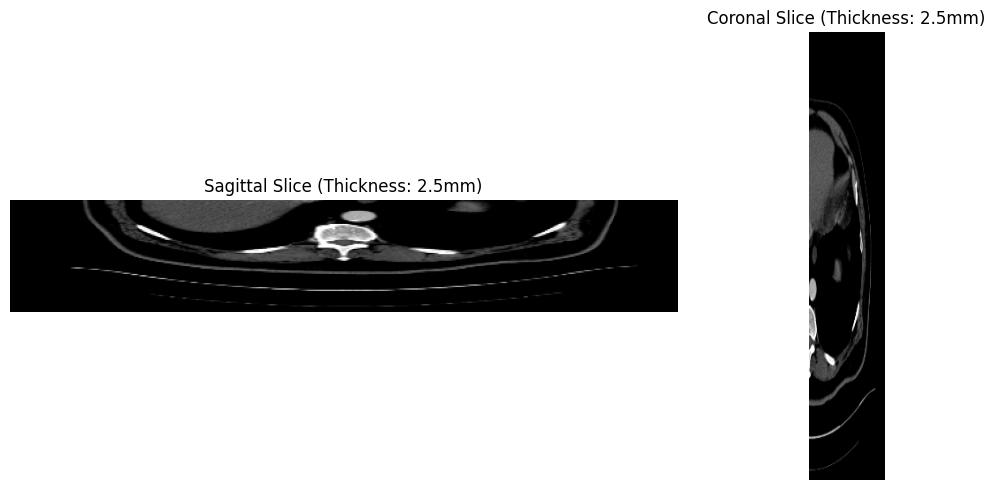

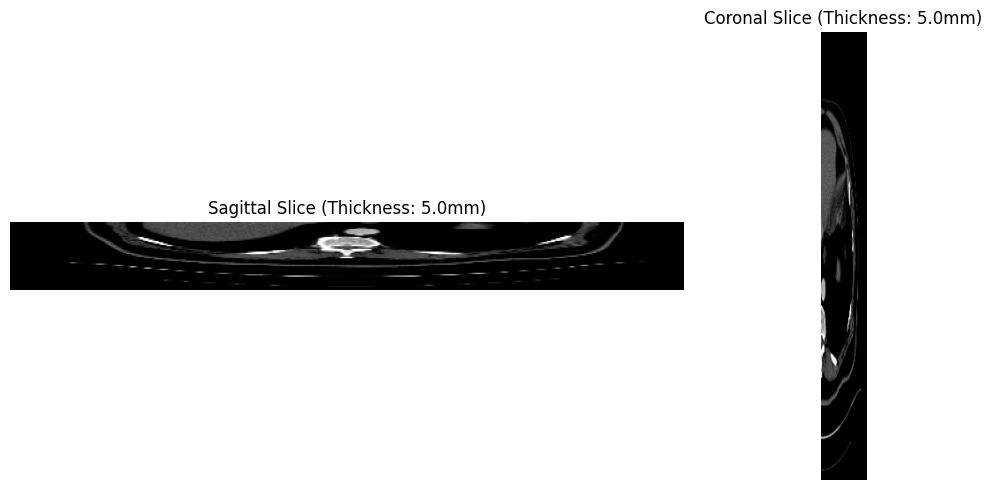

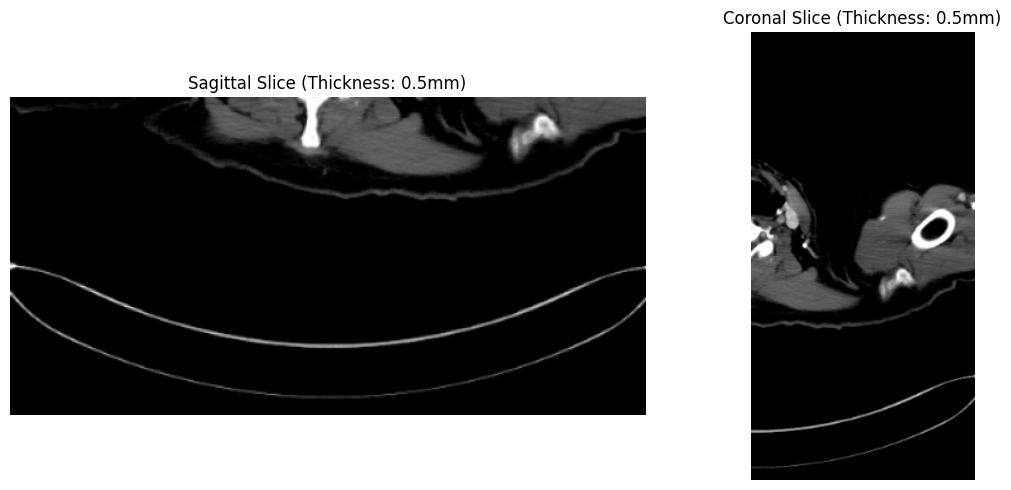

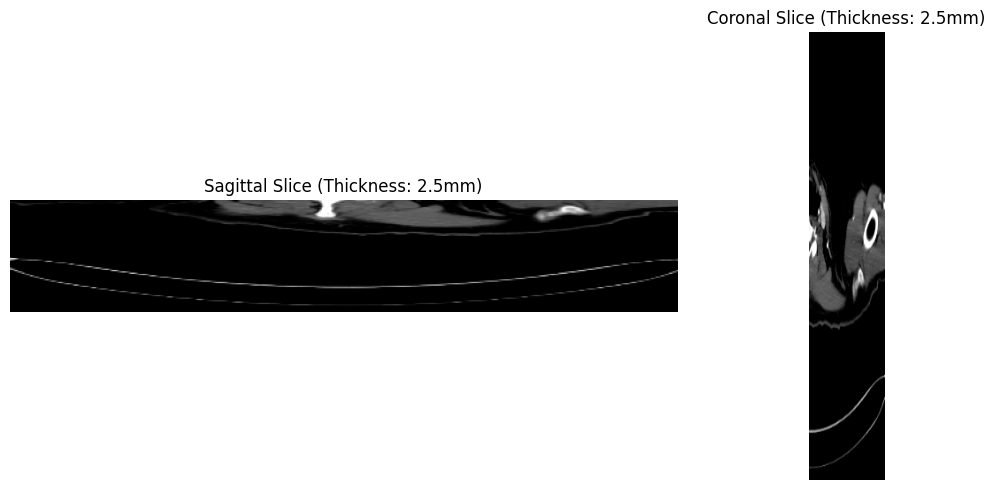

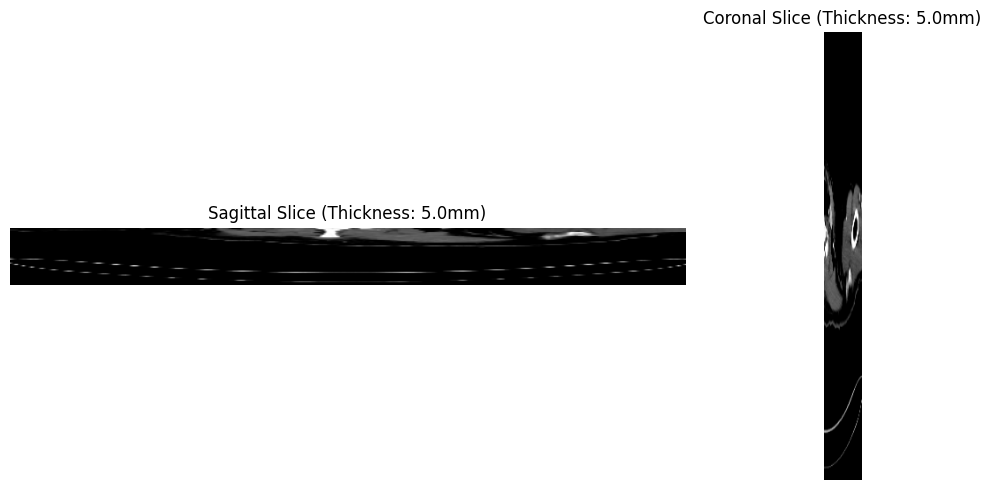

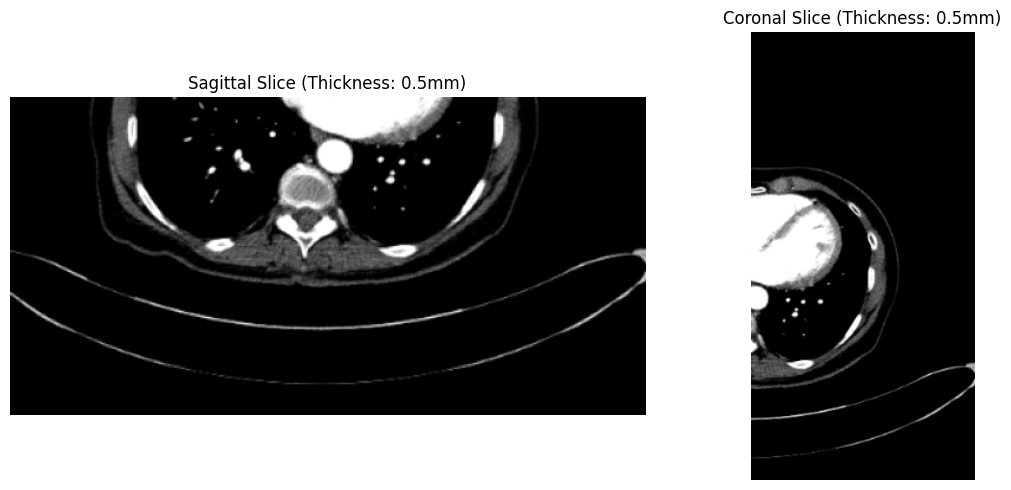

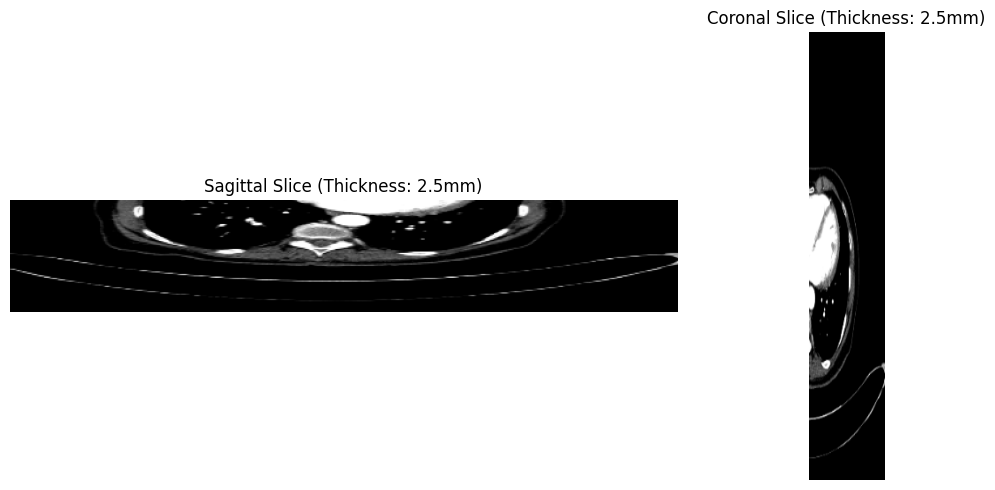

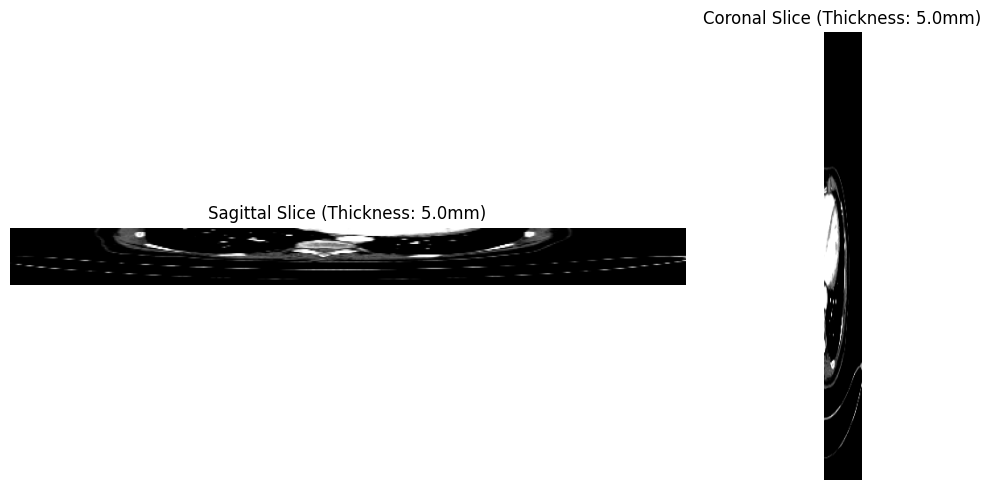

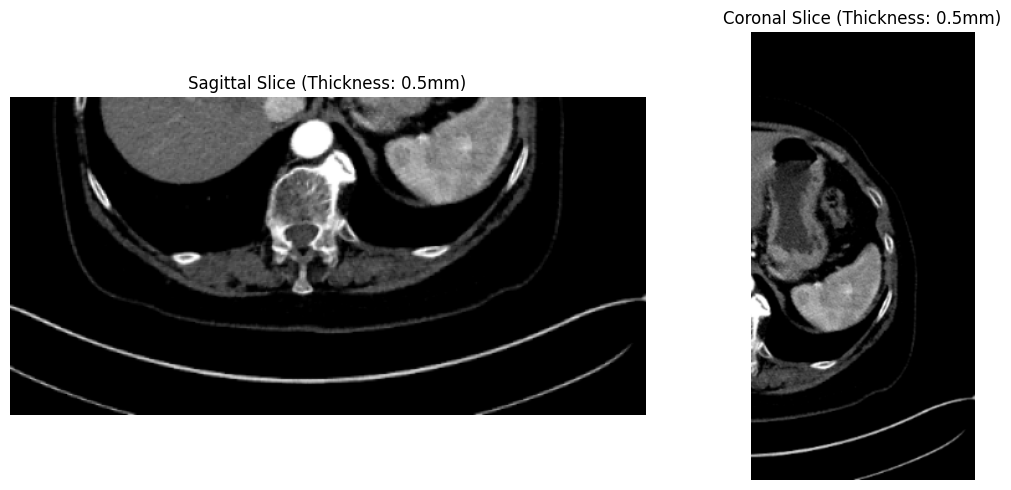

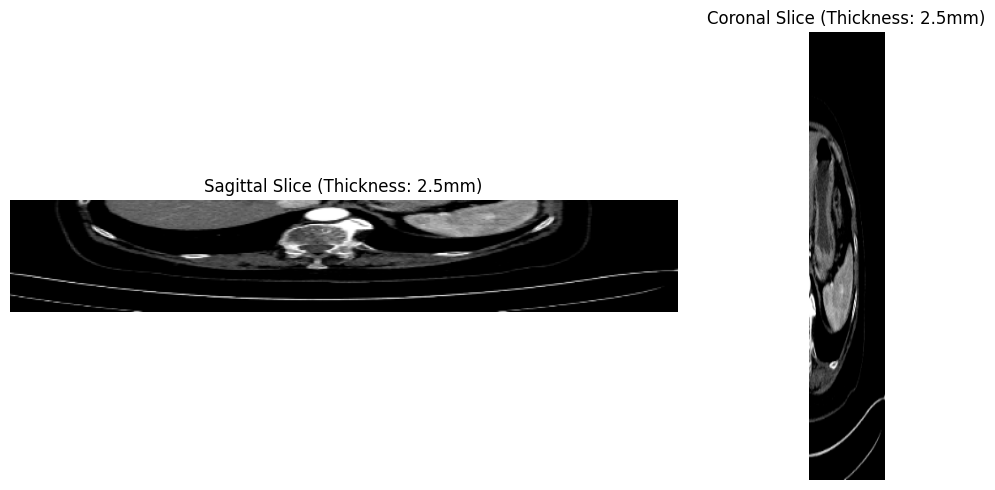

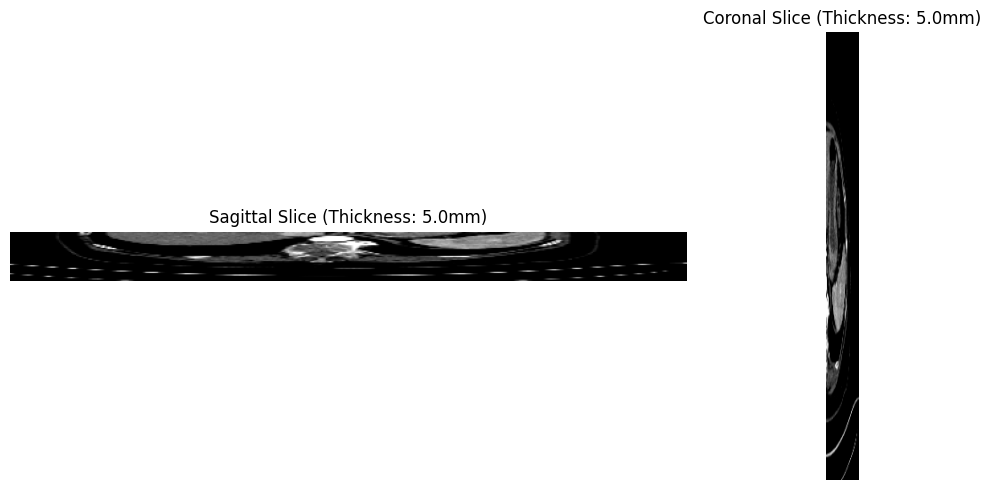

In [4]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the processed files
processed_path = "D:/kits23/resampled_and_sliced_images/"

# Define the range of case numbers to visualize (00000 to 00010)
case_range = range(0, 11)  # First 11 cases (00000 to 00010)

# Define the slice thicknesses in mm
slice_thicknesses = [0.5, 2.5, 5.0]  # For sagittal and coronal planes

# Loop through each case in the range
for case_num in case_range:
    # Format the case name with leading zeros
    case_name = f"case_{case_num:05d}_windowed.nii.gz_resampled_and_sliced.nii.gz"
    case_file = os.path.join(processed_path, case_name)

    # Check if the file exists
    if not os.path.exists(case_file):
        print(f"File not found: {case_file}")
        continue

    # Load the NIfTI file
    nifti_obj = nib.load(case_file)
    slices_data = nifti_obj.get_fdata()

    # Get voxel spacing (assuming isotropic resolution in XY plane)
    voxel_spacing_z = nifti_obj.header['pixdim'][3]  # Slice thickness in the Z direction (mm)

    # Loop through each slice thickness
    for thickness in slice_thicknesses:
        # Calculate the index step for the given slice thickness
        slice_step = max(1, int(round(thickness / voxel_spacing_z)))  # Ensure step is at least 1

        # Extract slices for the sagittal and coronal planes at the given slice thickness
        slice_index_sagittal = slices_data.shape[1] // 2  # Middle slice in sagittal plane
        slice_index_coronal = slices_data.shape[2] // 2  # Middle slice in coronal plane

        # Select slices at intervals according to slice thickness
        sagittal_slice = slices_data[:, slice_index_sagittal::slice_step, :]
        coronal_slice = slices_data[:, :, slice_index_coronal::slice_step]

        # Plot the slices
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        axes[0].imshow(sagittal_slice[0, :, :], cmap="gray")  # Visualize first slice in sagittal
        axes[0].set_title(f"Sagittal Slice (Thickness: {thickness}mm)")
        axes[0].axis("off")

        axes[1].imshow(coronal_slice[0, :, :], cmap="gray")  # Visualize first slice in coronal
        axes[1].set_title(f"Coronal Slice (Thickness: {thickness}mm)")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()
